# Библиотеки

In [4]:
from zlib import crc32

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from matplotlib.pyplot import figure
from numpy import transpose

import warnings
warnings.filterwarnings("ignore")

# Код генерации выборки

In [2]:
import re
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    x = np.linspace(0, 10, 100)
    return rs.randint(1,3)*x + 3*np.sin(0.5*rs.randint(10, 20)*x/np.pi) + 0.5*rs.randn(len(x))

# Генерация выборки для вашей почты

<span style="color:red">
    ВАЖНО!
    Почта, которую укажете ниже и почта с которой Вы отправляете домашнее задание должна совпадать!
    В момент проверки задания алгоритм генерирует выборку на основе почты из анкеты!
</span>

Внимательно проверьте почту для которой выполняется задание!

In [3]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

task

Enter your mail: egorov.sa@phystech.edu


{'mail': 'egorov.sa@phystech.edu',
 'id': 1581189463,
 'data': array([-0.08949395,  0.37562164,  1.33541319,  2.66823273,  2.82657424,
         3.34371653,  3.89275421,  4.98784555,  4.62719243,  4.14673939,
         4.28304543,  4.62516222,  4.4041089 ,  4.29935127,  4.700659  ,
         4.04683082,  3.2579419 ,  2.93902097,  3.21871361,  1.71834915,
         2.58814027,  1.28784645,  1.19080003,  2.10041864,  2.93150677,
         2.25162206,  2.80050006,  2.56712063,  2.64654349,  3.26034037,
         4.06620022,  6.39060515,  5.74282932,  7.14545065,  7.50897772,
         8.3432463 ,  9.43904016, 10.11490996, 10.10770539, 10.63566985,
        10.85516576, 11.28096199, 12.4548621 , 11.3879709 , 11.06970706,
        10.82190479, 10.3254282 , 10.11237729, 10.36972371,  9.59647967,
         9.94118464,  9.57884855,  9.21906461,  8.30877854,  8.77725795,
         8.04820208,  7.77649142,  8.68180672,  7.94080493,  9.28194   ,
         9.43581785,  9.76701418, 10.5745637 , 11.47648727, 12

# Работа с выборкой

In [6]:
data = pd.DataFrame(task['data'])
data.describe()

,0
count,100.000000
mean,9.945345
std,5.705772
min,-0.089494
25%,4.295275
50%,10.024445
75%,15.255523
max,20.391104


In [7]:
plt.rcParams['figure.figsize'] = (9.0, 6.0)
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 14})

Посмотрим на график значений в TimeSeries

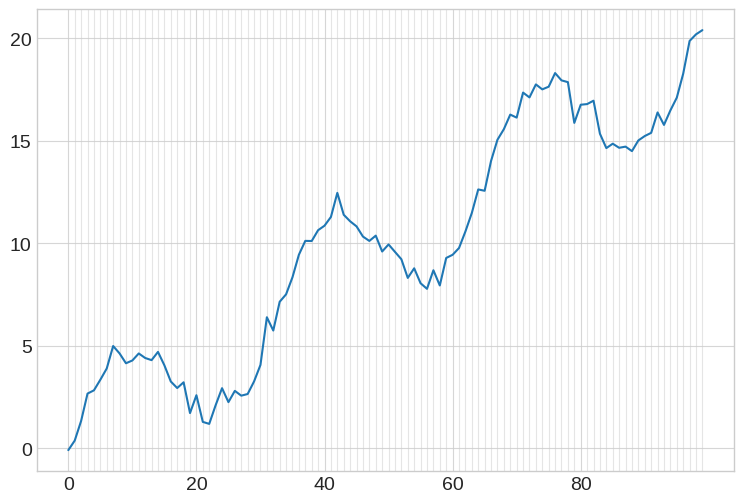

In [8]:
fig = figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(data.index, data.values[:,0])
x_minor = np.arange(0, len(data), 1)
x_major = np.arange(0, len(data), 20)
x_minor = np.setdiff1d(x_minor, x_major)

ax.set_xticks(x_major)
ax.set_xticks(x_minor, minor=True)
ax.grid(which='both')

ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.8)

plt.show()

# Задание

## Вопрос 1
Найдите период временного ряда


Тут я использую $T=26$, потому что ниже я сделал скрипт для перебора периодов и выбрал тот, для которого `decomposition` ближе всего к линейке.


В общем, периодическая зависимость может быть формально определена как корреляционная зависимость порядка $k$ между каждым $i$-м элементом ряда и ($i-k$)-м элементом. Ее можно измерить с помощью автокорреляции (т.е. корреляции между самими членами ряда); $k$ обычно называют лагом (иногда используют эквивалентные термины: сдвиг, запаздывание). Если ошибка измерения не слишком большая, то сезонность можно определить визуально, рассматривая поведение членов ряда через каждые $k$ временных единиц.

**sum up:** если я правильно нашёл период, то график остатков будет непериодичен и скорее всего будет удовлетворять предпосылкам Г-М.


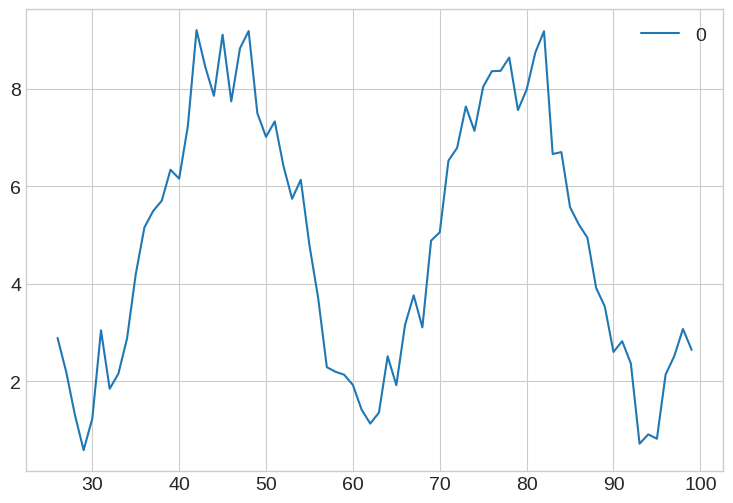

In [9]:
data.diff(periods=26).plot()
plt.show()

<Figure size 3200x1800 with 0 Axes>

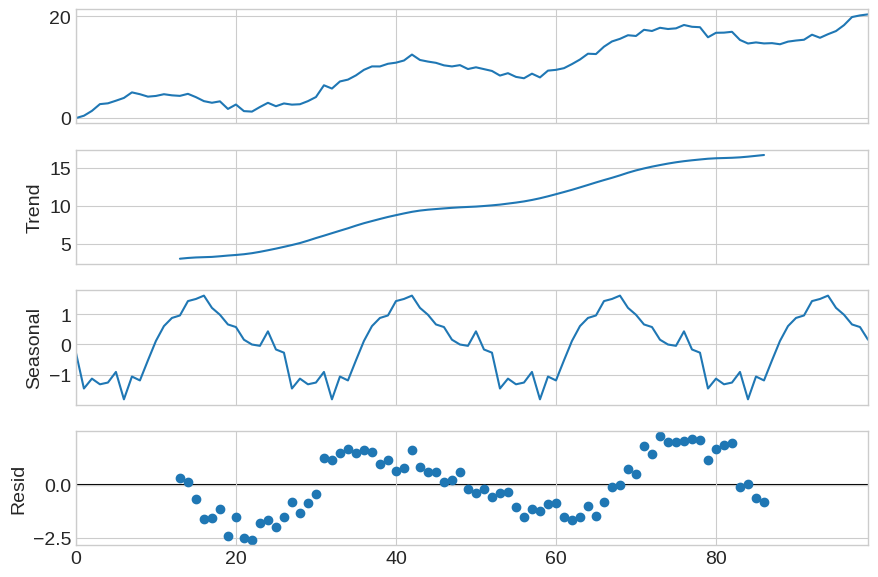

In [11]:
figure(figsize=(16, 9), dpi=200)
stl_data = seasonal_decompose(data, period=26)
_ = stl_data.plot()
plt.show()

При правильном подборе периода trend будет прямой линией. Давайте честно переберём значения периода и посмотрим на тренд.

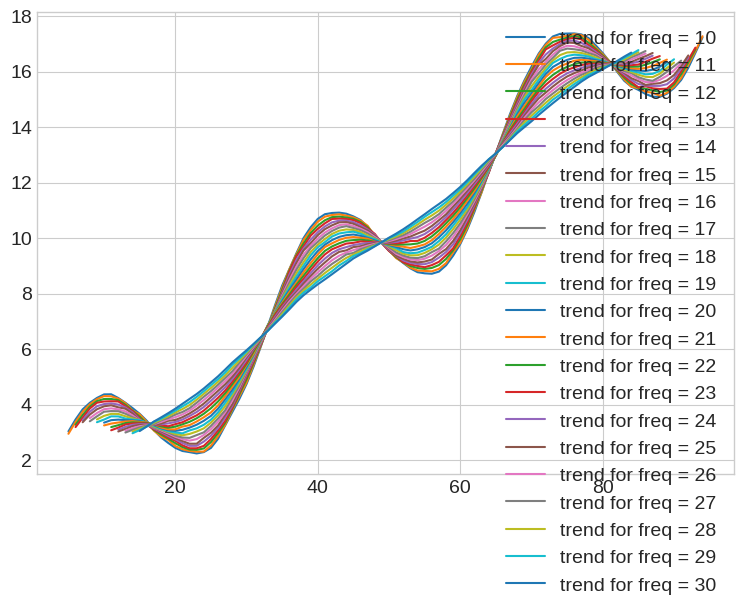

In [18]:
for i in range(10, 31):
    plt.plot(seasonal_decompose(data, period=i).trend, label=f"trend for freq = {i}")
plt.legend()
plt.show()

...но получается так себе. Поэтому я перебирал дальше.

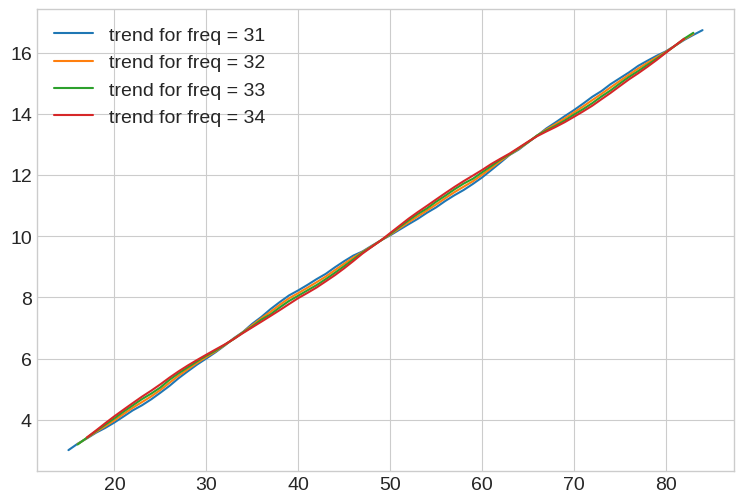

In [16]:
for i in range(31, 36):
    plt.plot(seasonal_decompose(data, period=i).trend, label=f"trend for freq = {i}")
plt.legend()
plt.show()

Похоже на то, что наш период входит в эти значения. Посмотрим внимательней.

Следующая итерация: посмотрим на $i=26$ и $i=27$

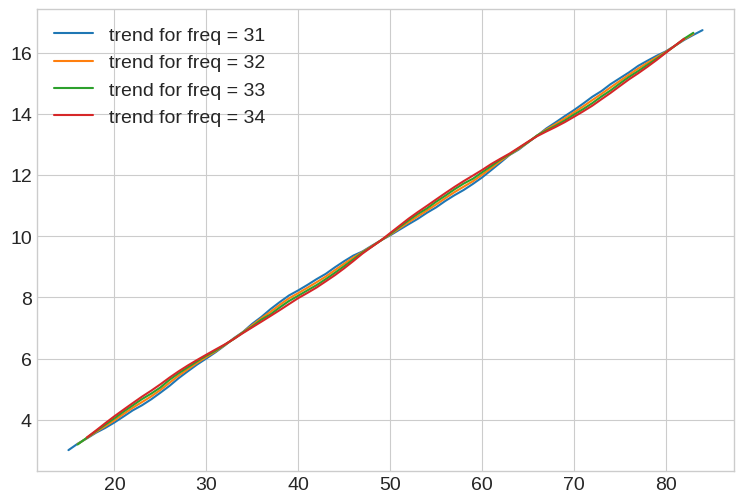

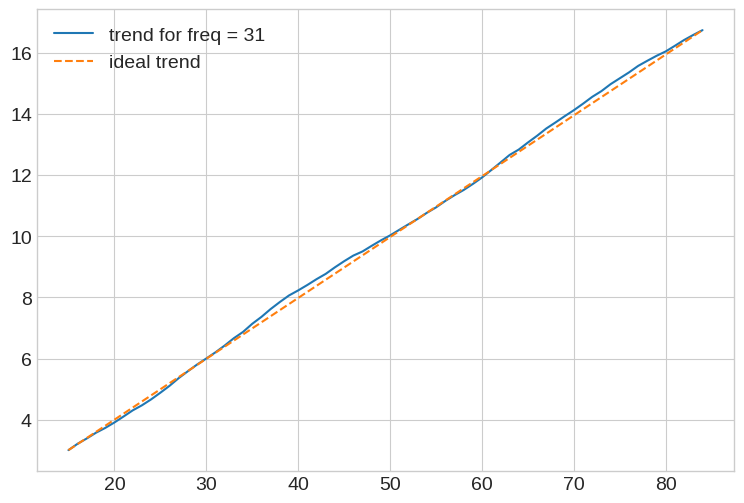

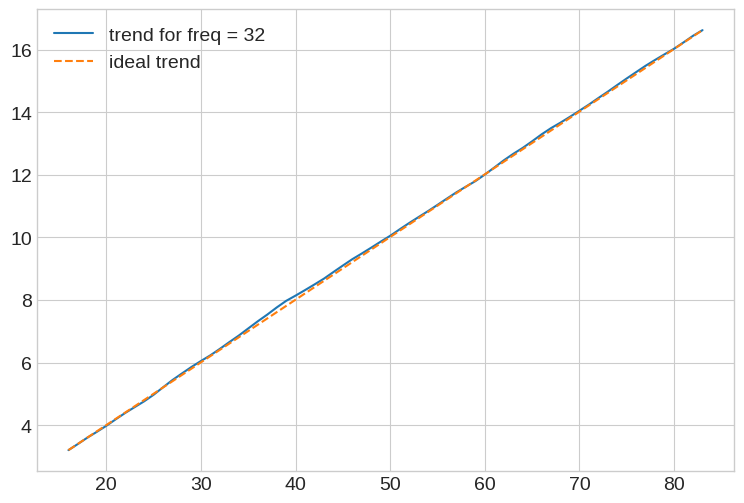

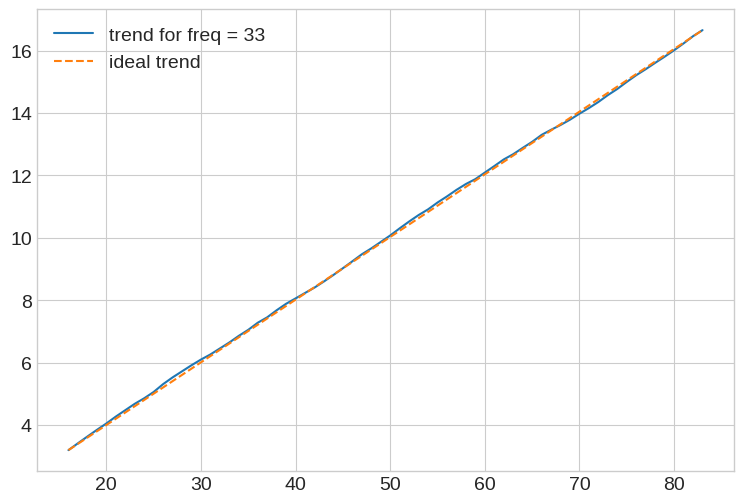

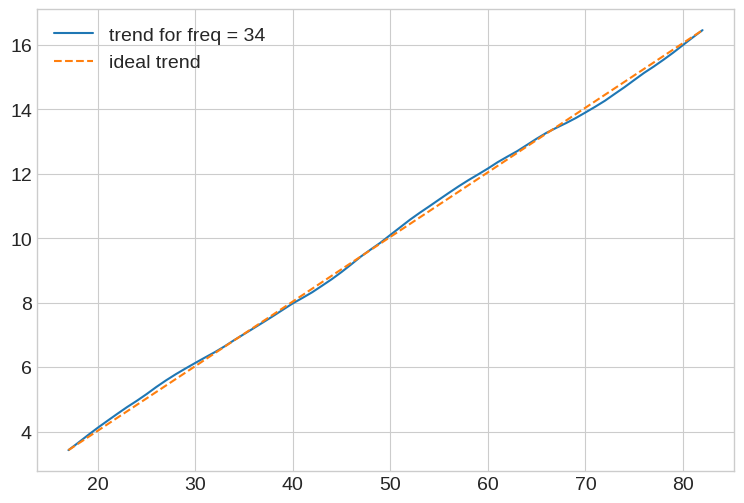

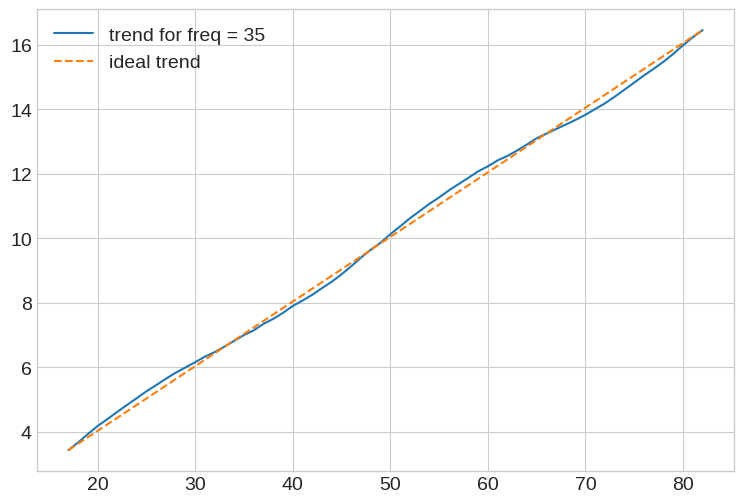

In [19]:
for i in range(31, 35):
    plt.plot(seasonal_decompose(data, period=i).trend, label=f"trend for freq = {i}")
plt.legend()
plt.show()

decomp = seasonal_decompose(data, period=31).trend.dropna()
plt.plot(decomp, label=f"trend for freq = 31")
plt.plot((decomp.index.min(), decomp.index.max()), (decomp.min(), decomp.max()), '--', label="ideal trend")
plt.legend()
plt.show()

decomp = seasonal_decompose(data, period=32).trend.dropna()
plt.plot(decomp, label=f"trend for freq = 32")
plt.plot((decomp.index.min(), decomp.index.max()), (decomp.min(), decomp.max()), '--', label="ideal trend")
plt.legend()
plt.show()

decomp = seasonal_decompose(data, period=33).trend.dropna()
plt.plot(decomp, label=f"trend for freq = 33")
plt.plot((decomp.index.min(), decomp.index.max()), (decomp.min(), decomp.max()), '--', label="ideal trend")
plt.legend()
plt.show()

decomp = seasonal_decompose(data, period=34).trend.dropna()
plt.plot(decomp, label=f"trend for freq = 34")
plt.plot((decomp.index.min(), decomp.index.max()), (decomp.min(), decomp.max()), '--', label="ideal trend")
plt.legend()
plt.show()

decomp = seasonal_decompose(data, period=35).trend.dropna()
plt.plot(decomp, label=f"trend for freq = 35")
plt.plot((decomp.index.min(), decomp.index.max()), (decomp.min(), decomp.max()), '--', label="ideal trend")
plt.legend()
plt.show()

Чисто по графичкам 32 мне нравится больше.\
Есть ещё вариант посмотреть на максимальное изменение производной KPSS статистики:

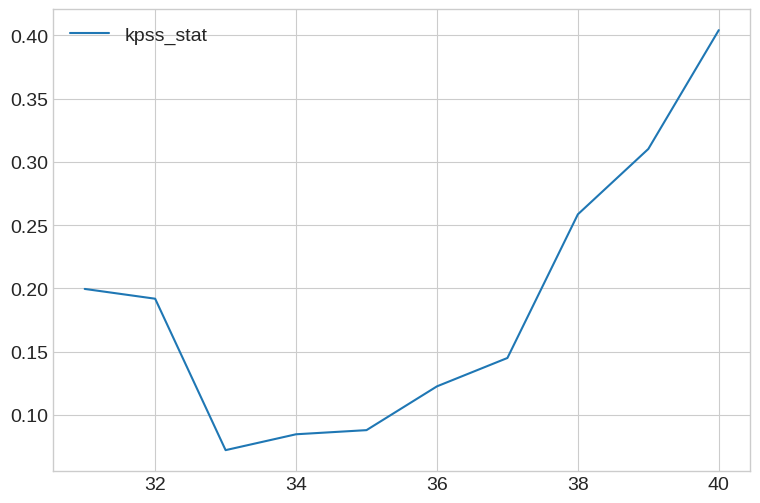

In [23]:
kpss_s = []

for i in range(31, 41):
    stl_data = seasonal_decompose(data[0], period=i)
    r = stl_data.resid.dropna()
    kpss_s.append((i, kpss(r, nlags='legacy')[0]))
kpss_s = transpose(kpss_s)
plt.plot(kpss_s[0], kpss_s[1], label='kpss_stat')
plt.legend()
plt.show()

Итого, возьмем `period=33`

## Вопрос 2
Значение статистики KPSS для остатков в разложение seaconal_decompose где период указан с предыдущего пункта.

In [24]:
stl_data = seasonal_decompose(data[0], period=33)
kpss(stl_data.resid.dropna(), nlags='legacy')

(0.07234759271880091,
 0.1,
 11,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [26]:
print(f"kpss: {kpss(stl_data.resid.dropna(), nlags='legacy')[0]:.3}")

kpss: 0.0723


## Бонус

Автокорреляционная коррелограмма. Сезонные составляющие временного ряда могут быть найдены с помощью коррелограммы. Коррелограмма (автокоррелограмма) показывает численно и графически автокорреляционную функцию (AКФ), иными словами коэффициенты автокорреляции (и их стандартные ошибки) для последовательности лагов из определенного диапазона.

**sum up:** всё в пределах затенённой области входит в 95% CI для автокорреляции. Лаги посчитаны kpss, можете глянуть в документацию.

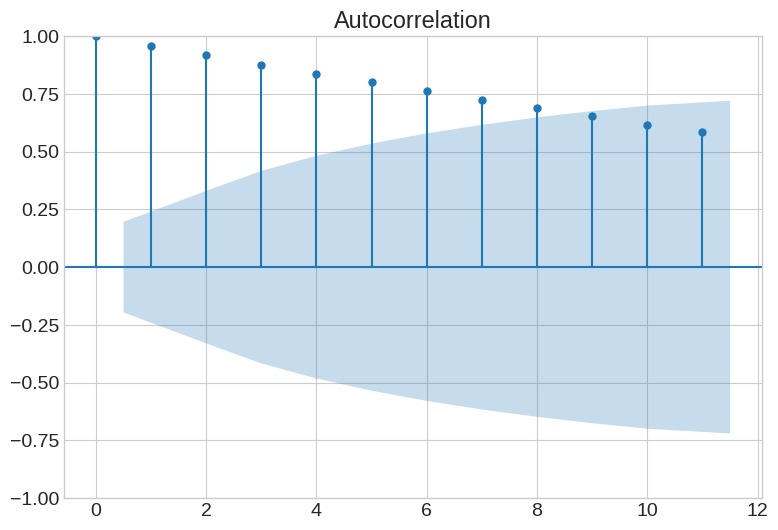

In [28]:
plot_acf(data.values, lags=11)
plt.show()